In [5]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# In this notebook we will see some probability distributions and some theorems. I am assuming here that
# you have basic understanding of probability(like dependent events, non-dependent events, conditional probability)

In [ ]:
# Some basic probability definitions
# P(E) = Probability of occuring of an event E
# P(E,F) = Probabiltiy of occuring of both event E and F
# P(E|F) = Probability of ocurring of event E given that event F has already occured.(Conditional Probability)

In [ ]:
# Bayes Theorem
# P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)
# Now we can divide event F as P(F) = P(F,E) +P(F,~E)    [~E = Not occuring of event E]
# So,
# P(E|F) = P(F|E)P(E)/(P(F|E)*P(E) + P(F|~E)*P(~E))  #Bayes theorem usually is states in this way.

In [ ]:
# Random vairables
# A random variable takes a set of possible values, and these values have an associated probability distribution.

In [3]:
# Continuous Distribution
# Coin flipping is a discrete distribution
# But often we will want to model distribution across continuum of outcomes.
# For example, uniform distribution gives equal proababilites to all numbers between 0 and 1.

# As there are infinite numbers between 0 and 1, the weight it assigns to a individual point will be 
# necessarily 0.
# That's why, we represent continuous distribution with probability density function(pdf), and probability of seeing
# a particular point in a given range is the integral of pdf over the given range.

In [6]:
# probability density function for uniform distribution
def uniform_pdf(x):
    return 1 if x>=0 and x<1 else 0

In [8]:
# We will often be interseted in cumulative density function(cdf), which gives the probability that 
# a random value is less than or equal to a certain value.

In [7]:
# cumulative density function for uniform distribution
def uniform_cdf(x):
    if x<0:
        return 0;
    elif x<1:
        return x;
    else:
        return 1

In [10]:
# Normal distribution
# This is the most important and popular distribution.

In [35]:
def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pie = np.sqrt(2*(np.pi)) 
    return np.exp(-(x-mu)**2/(2*(sigma)**2))/(sqrt_two_pie*sigma)
# import math
# def normal_pdf(x, mu=0, sigma=1):
#     sqrt_two_pi = math.sqrt(2 * math.pi)
#     return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

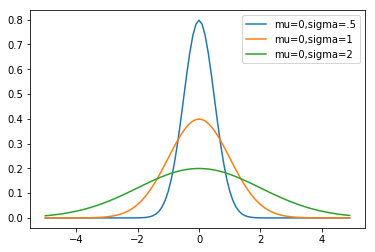

In [36]:
# plot of normal distribution
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=.5) for x in xs],'-',label='mu=0,sigma=.5')
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'-',label='mu=0,sigma=2')
plt.legend()
plt.show()


In [15]:
# when mu=0 and sigma=1 it is called standard normal distribution
# If Z is a standard normal distribution, and X is a normal distribution
# Z = (X-mu)/sigma

3.141592653589793


In [38]:
# The cumulative distribution function for normal distribution
def normal_cdf(x,mu=0,sigma=1):
    return (1+np.erf((x-mu)/np.sqrt(2)/sigma))/2

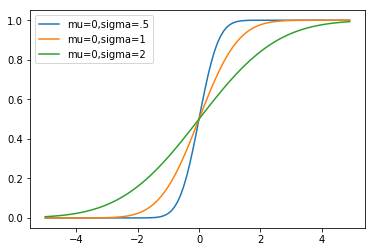

In [39]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=.5) for x in xs],'-',label='mu=0,sigma=.5')
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'-',label='mu=0,sigma=2')
plt.legend()
plt.show()

In [ ]:
# To find a value corresponding to a specific probability
def inverse_normal_cdf(p, mu=0,sigma=1,tolerance=.00001):
    if mu!=0 or sigma!=1:
        return mu + sigma*inverse_normal_cdf(p.tolerance=tolerance)
    low_z,low_p = -10,0
    high_z,high_p = 10,1
    while hi_z - low_z > tolerance:
        mid_z = (low_z+hi_z)/2
        mid_p = normal_cdf(mid_z)
        if mid_p<p:
            low_z,low_p = mid_z,mid_p
        elif mid_p > p:
            high_z,high_p = mid_z,mid_p
        else:
            break
        return mid_z

In [ ]:
# The central limit theorem
# The normal distribution is so popular and useful because of the Central limit theorem.
# Central limit theorem says that a random variable defined as the average of a large number of 
# independent and identically distributed random variables is approximately normally distributed. 

#If we calculate mean of a sample, it will be an estimate of the mean of the population distribution.
# But,like any estimate, it will be wrong and will contain some error. If we draw multiple independent samples, 
# and calculate their means, the distribution of those means will form a normal distribution
# Let's take an example of a dice roll to understand this theorem

In [41]:
np.random.seed(0)
rolls = np.random.randint(1,7,50)
print("Rolls of the dice :",rolls)
print("mean of rolls :",np.mean(rolls))

Rolls of the dice : [5 6 1 4 4 4 2 4 6 3 5 1 1 5 3 2 1 2 6 2 6 1 2 5 4 1 4 6 1 3 4 1 2 4 6 4 4
 1 2 2 2 1 3 5 4 4 3 5 3 1]
mean of rolls : 3.22


In [42]:
# The expected mean value of dice is (1+2+3+4+5+6)/6  = 21/6 = 3.5
# We can see the mean value we calculated is slighly wrong, which is to be expected as 
# it is an estimate of a population mean
# We can repeat this process multiple times(say 1000), and this will give us a result of 1000 sample means.
# According to the central limit theorem, the distribution of these sample means will be Normal.

In [43]:
means = [np.mean(np.random.randint(1,7,50)) for _ in range(1000)]

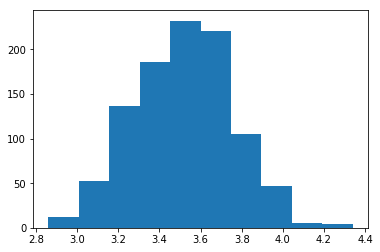

In [44]:
plt.hist(means)
plt.show()

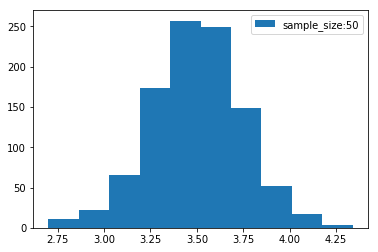

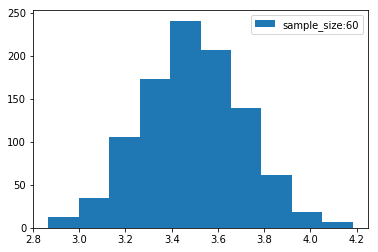

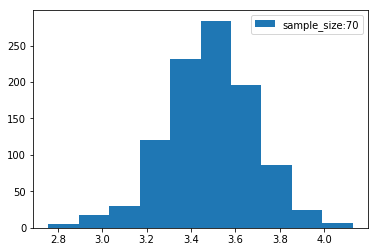

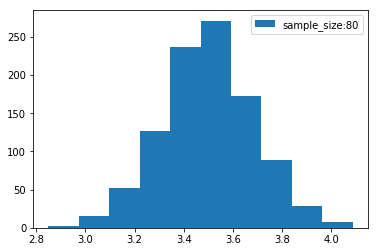

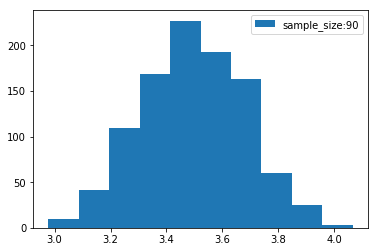

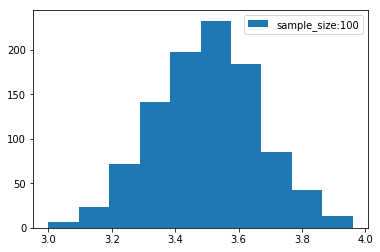

In [48]:
# From the above plot, we can see that the distribution is Normal.
# If we increase the sample size, then better the sample size will approximate normal distribution.
sample_size=[50,60,70,80,90,100]
for size in sample_size:
    means = [np.mean(np.random.randint(1,7,size)) for _ in range(1000)]
    plt.hist(means,label='sample_size:'+str(size))
    plt.legend()
    plt.show()